In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

listing_data = "Data/listings.csv"
reviews_data = "Data/reviews.csv"
calendar_data = "Data/calendar.csv"

listings_df = pd.read_csv(listing_data)
reviews_df = pd.read_csv(reviews_data)
calendar_df = pd.read_csv(calendar_data)

In [11]:
listings_df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1742654,High Floor apt.near Columbus Circle,9173924,Jon,Manhattan,Hell's Kitchen,40.76708,-73.98600,Entire home/apt,200,2,114,2019-04-15,1.87,1,204
1,23502842,Cozy East Village studio,34777741,Tiffany,Manhattan,East Village,40.72205,-73.98132,Entire home/apt,159,2,8,2018-09-08,0.66,1,10
2,15984984,Great Location by Subway!,9737900,Nilu,Brooklyn,Clinton Hill,40.68252,-73.96436,Entire home/apt,180,4,36,2019-04-30,1.24,1,10


In [19]:
listings_df.rename(columns = {'neighbourhood_group': 'borough'}, inplace = True)
listings_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'borough', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [12]:
reviews_df.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2539,55688172,2015-12-04,25160947,Peter,Great host
1,5178,2091,2009-05-06,8443,Dimitri,"MR. Kasai was a grreat host , very helpful and..."
2,5178,3015,2009-05-23,15642,Duong,The room is great and the hosts are superb!!


In [20]:
merged_df = pd.merge(listings_df, reviews_df, how="left", on=["id", "id"])
merged_df.head(3)

,id,name,host_id,host_name,borough,neighbourhood,latitude,longitude,room_type,price,...,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,listing_id,date,reviewer_id,reviewer_name,comments
0,1742654,High Floor apt.near Columbus Circle,9173924,Jon,Manhattan,Hell's Kitchen,40.76708,-73.98600,Entire home/apt,200,...,114,2019-04-15,1.87,1,204,NaN,NaN,NaN,NaN,NaN
1,23502842,Cozy East Village studio,34777741,Tiffany,Manhattan,East Village,40.72205,-73.98132,Entire home/apt,159,...,8,2018-09-08,0.66,1,10,NaN,NaN,NaN,NaN,NaN
2,15984984,Great Location by Subway!,9737900,Nilu,Brooklyn,Clinton Hill,40.68252,-73.96436,Entire home/apt,180,...,36,2019-04-30,1.24,1,10,NaN,NaN,NaN,NaN,NaN


In [21]:
merged_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'borough', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'listing_id',
       'date', 'reviewer_id', 'reviewer_name', 'comments'],
      dtype='object')

In [41]:
organized_df = merged_df[["borough","room_type","price","number_of_reviews", "reviews_per_month", "availability_365", "id"]]
organized_df.head()

,borough,room_type,price,number_of_reviews,reviews_per_month,availability_365,id
0,Manhattan,Entire home/apt,200,114,1.87,204,1742654
1,Manhattan,Entire home/apt,159,8,0.66,10,23502842
2,Brooklyn,Entire home/apt,180,36,1.24,10,15984984
3,Brooklyn,Entire home/apt,99,9,0.27,51,13820083
4,Brooklyn,Entire home/apt,100,122,2.63,257,6170979


In [91]:
counts = organized_df["borough"].value_counts()
counts

Manhattan        22091
Brooklyn         19975
Queens            5493
Bronx             1033
Staten Island      349
Name: borough, dtype: int64

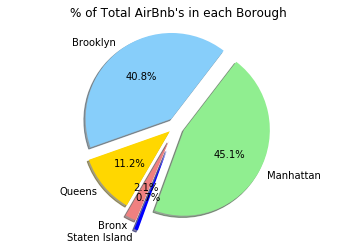

In [92]:
labels = ["Manhattan", "Brooklyn", "Queens", "Bronx", "Staten Island"]

sizes = [22091, 19975, 5493, 1033, 349]

explode = (0.1, 0.1, 0.1, 0.2, 0.3)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=250, colors = ["lightgreen", "lightskyblue", "gold", "lightcoral", "blue"])
ax1.axis('equal') 
plt.title("% of Total AirBnb's in each Borough")
plt.show()

Manhattan = merged_df.loc[merged_df["borough"] == "Manhattan"].sum()
Brooklyn = merged_df.loc[merged_df["borough"] == "Brooklyn"].sum()
Queens  = merged_df.loc[merged_df["borough"] == "Queens "].sum()                  
Bronx = merged_df.loc[merged_df["borough"] == "Bronx"].sum()  
Staten_Island = merged_df.loc[merged_df["borough"] == "Staten Island"].sum()
                  
labels = ['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island']
sizes = [Manhattan, Brooklyn, Queens, Bronx, Staten_Island]
explode = (0.1, 0.1, 0, 0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=250, colors = ["lightgreen", "lightskyblue", "gold", "lightcoral", "blue"])
ax1.axis('equal') 
plt.show()

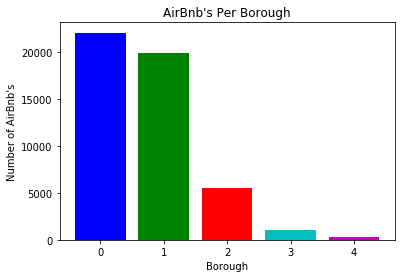

In [110]:
Boroughs = ["Manhattan", "Brooklyn", "Queens", "Bronx", "Staten Island"]
amt_airbnb = [22091, 19975, 5493, 1033, 349]
x_axis = np.arange(len(amt_airbnb))

colors = "bgrcmykw"
    
plt.bar(x_axis, amt_airbnb, color="bgrcmykw", align="center")
   
plt.title("AirBnb's Per Borough")
plt.xlabel("Borough")
plt.ylabel("Number of AirBnb's")
plt.show()

In [93]:
organized_df.head()

,borough,room_type,price,number_of_reviews,reviews_per_month,availability_365,id
0,Manhattan,Entire home/apt,200,114,1.87,204,1742654
1,Manhattan,Entire home/apt,159,8,0.66,10,23502842
2,Brooklyn,Entire home/apt,180,36,1.24,10,15984984
3,Brooklyn,Entire home/apt,99,9,0.27,51,13820083
4,Brooklyn,Entire home/apt,100,122,2.63,257,6170979


In [94]:
counts

Manhattan        22091
Brooklyn         19975
Queens            5493
Bronx             1033
Staten Island      349
Name: borough, dtype: int64

In [95]:
#Average Price per borough
average_price = organized_df.groupby("borough")["price"].mean()
average_price = pd.DataFrame(average_price).reset_index()
average_price = average_price.rename(columns = {'price': 'avg price'})
#Total Number of AirBnb per borough
total_Airbnb = organized_df.groupby("borough")["id"].count()
total_Airbnb = pd.DataFrame(total_Airbnb).reset_index()
total_Airbnb = total_Airbnb.rename(columns = {'borough': 'Total housing'})


In [98]:
#Total Housing
total_House = organized_df[["borough", "id"]].drop_duplicates("borough")
#Borough Type
borough_type = organized_df[["borough", "id"]].drop_duplicates("borough")

In [102]:
#final_df = organized_df.merge(organized_df.merge(organized_df.merge(average_price, total_Airbnb, on="borough"), 
#                             total_House, on="borough"), borough_type, on="borough")

In [103]:
Manhattan = organized_df.loc[organized_df['borough'] == "Manhattan"]
Brooklyn = organized_df.loc[organized_df['borough'] == "Brooklyn"]
Queens  = organized_df.loc[organized_df['borough'] == "Queens "]                  
Bronx = organized_df.loc[organized_df['borough'] == "Bronx"] 
Staten_Island = organized_df.loc[organized_df['borough'] == "Staten Island"]

ax1 = Manhattan.plot(kind='scatter',x='average_price', y='total_Airbnb',
                       color='lightgreen', s=organized_df['Manhattan'], label = 'Manhattan', 
                       alpha = 0.9, edgecolor = "black", linewidths = 1)    
ax2 = Brooklyn.plot(kind='scatter', x='average_price', y='total_Airbnb', 
                          color='lightskyblue',s=organized_df['Brooklyn'], label = 'Brooklyn', 
                          alpha = 0.9, edgecolor = "black", linewidths = 1, ax=ax1)    
ax3 = Queens.plot(kind='scatter', x='average_price', y='total_Airbnb', 
                       color='gold', s=organized_df['Queens'], label = 'Queens', 
                       alpha = 0.9, edgecolor = "black", linewidths = 1, ax=ax1)
ax4 = Bronx.plot(kind='scatter', x='average_price', y='total_Airbnb', 
                          color='lightcoral',s=organized_df['Bronx'], label = 'Bronx', 
                          alpha = 0.9, edgecolor = "black", linewidths = 1, ax=ax1)    
ax5 = Staten_Island.plot(kind='scatter', x='average_price', y='total_Airbnb', 
                       color='blue', s=organized_df['Staten Island'], label = 'Staten Island', 
                       alpha = 0.9, edgecolor = "black", linewidths = 1, ax=ax1)


plt.title("AirBnb's in Each Borough of NY")
plt.xlabel("Total Number of Housing")
plt.ylabel("Average Price")
plt.legend(title = 'Borough')
plt.grid(True)

plt.show()

KeyError: 'Manhattan'